In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

In [3]:
df=pd.read_csv('/Users/bhaanaveecs/Documents/ML_I/Titanic-Dataset.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S


In [4]:
#Basic Info
print(df.shape)
print(df.isnull().sum())
df.describe()

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Handling missing values in Age (numerical) using median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop 'Cabin' column only if it exists
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

# Handling missing values in Embarked (categorical) using mode i.e S
df['Embarked'] = df['Embarked'].fillna('S')

In [6]:
#Convert categorical features into numerical using encoding.
l=LabelEncoder()
df['Sex']=l.fit_transform(df['Sex'])
df['Embarked']=l.fit_transform(df['Embarked'])


In [7]:
#Normalize/standardize the numerical features.
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

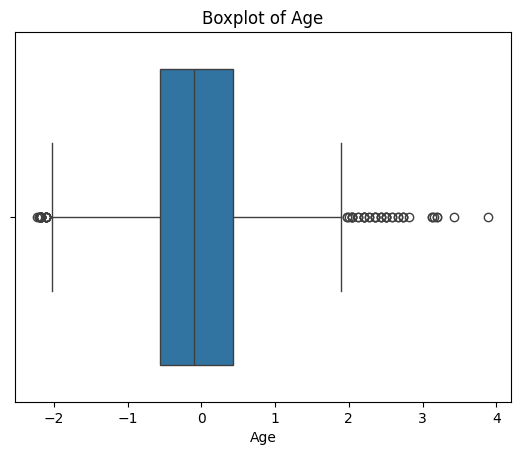

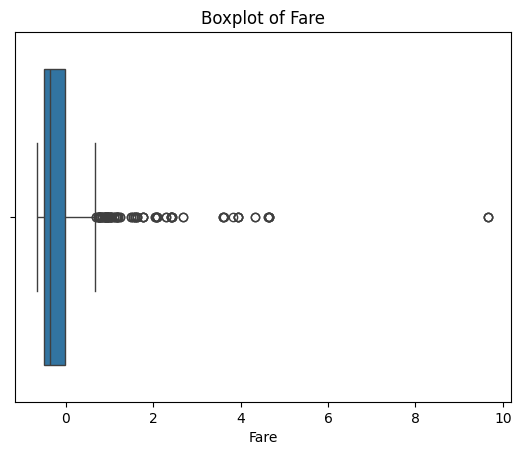

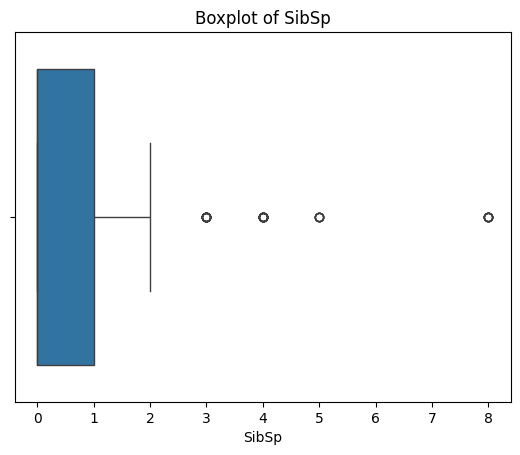

In [8]:
#Boxplot
for col in ['Age', 'Fare', 'SibSp']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
#outlier
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fare_outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print("Outliers in 'Fare':")
print(fare_outliers)
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

Outliers in 'Fare':
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name  Sex       Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
27                      Fortune, Mr. Charles Alexander    1 -0.796286      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)    0 -0.104637      1   
34                             Meyer, Mr. Edgar Joseph    1 -0.104637      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)    0  1.509209      1   
..                                         

In [10]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
814,815,0,3,"Tomlin, Mr. Ernest Portage",1,0.087487,0,0,364499,-0.486337,2
115,116,0,3,"Pekoniemi, Mr. Edvard",1,-0.642586,0,0,STON/O 2. 3101294,-0.488854,2
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",0,-0.027788,1,0,228414,-0.124920,2
404,405,0,3,"Oreskovic, Miss. Marija",0,-0.719436,0,0,315096,-0.474005,2
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",1,-0.565736,0,0,2620,-0.502949,0


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,775.000000,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,445.806452,0.339355,2.48000,0.685161,-0.047099,0.437419,0.340645,-0.289579,1.603871
std,260.116285,0.473796,0.73439,0.464752,0.982304,0.899838,0.785914,0.273391,0.734344
min,1.000000,0.000000,1.00000,0.000000,-2.224156,0.000000,0.000000,-0.648422,0.000000
25%,213.500000,0.000000,2.00000,0.000000,-0.565736,0.000000,0.000000,-0.489442,2.000000
50%,450.000000,0.000000,3.00000,1.000000,-0.104637,0.000000,0.000000,-0.386671,2.000000
75%,670.500000,1.000000,3.00000,1.000000,0.356462,1.000000,0.000000,-0.124920,2.000000
max,891.000000,1.000000,3.00000,1.000000,3.891554,5.000000,6.000000,0.660333,2.000000
